In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import os
import sys
import seaborn as sns
import pandas as pd
%matplotlib notebook


## J0437-4715 2.5 yr Data
Confirming the presence of arcs in J0437-4715 with a 2.5 year data set from MeerKAT
In this data, the epochs are not placed continuously 

In [27]:
telescope='MeerKAT'


if telescope=='MeerKAT':
    os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_MK_2p5yr')
    Total_chn=16
    residuals_J0437_Entire_data = np.genfromtxt('PostRes_2p5T.txt')
    residuals_J0437_SysNoise_Entire_data = np.genfromtxt('PostRes_2p5T_SysNoise.txt')


residuals_J0437_Entire_data = residuals_J0437_Entire_data.reshape((-1,Total_chn,4)) 

residuals_J0437_Entire=residuals_J0437_Entire_data[:,:,2]
Freq_J0437_Entire=np.mean(residuals_J0437_Entire_data[:,:,1],axis=0)

residuals_J0437_SysNoise_Entire_data = residuals_J0437_SysNoise_Entire_data.reshape((-1,Total_chn,4))

residuals_J0437_SysNoise_Entire=residuals_J0437_SysNoise_Entire_data[:,:,2]
Freq_J0437_SysNoise_Entire=np.mean(residuals_J0437_SysNoise_Entire_data[:,:,1],axis=0)


# residuals_J0437_Entire=residuals_J0437_Entire[0:-1,:]
# residuals_J0437_SysNoise_Entire=residuals_J0437_SysNoise_Entire[0:-1,:]

<IPython.core.display.Javascript object>


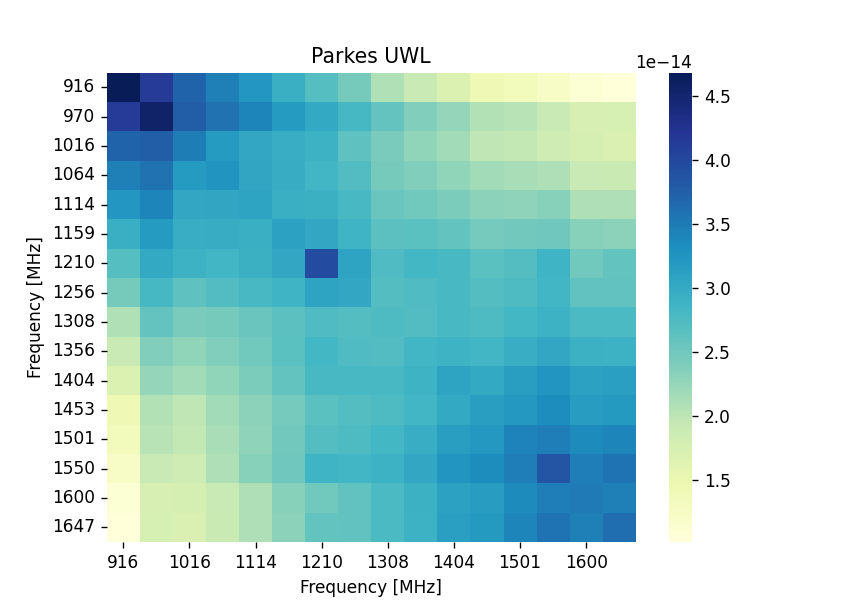

Text(0.5, 1.0, 'Parkes UWL')

In [37]:
Cov_res_J0437_Entire=np.cov(residuals_J0437_Entire,rowvar=False)
Corrcof_res_J0437_Entire=np.corrcoef(residuals_J0437_Entire,rowvar=False)
Cov_sysres_J0437_Entire=np.cov(residuals_J0437_SysNoise_Entire,rowvar=False)

if telescope=='MeerKAT':
    ef=np.zeros((residuals_J0437_SysNoise_Entire.shape[1],residuals_J0437_SysNoise_Entire.shape[1]))
    np.fill_diagonal(ef,10.9634**2)

    eq=np.zeros((residuals_J0437_SysNoise_Entire.shape[1],residuals_J0437_SysNoise_Entire.shape[1]))
    np.fill_diagonal(eq,10**(-5.4290*2))
    
    mat_ef_eq = np.multiply(Cov_sysres_J0437_Entire,ef) + eq

#Cov_jitter_J0437_Entire=Cov_sysres_J0437_Entire
Cov_jitter_J0437_Entire=Cov_res_J0437_Entire#-Cov_sysres_J0437_Entire
#Cov_jitter_J0437_Entire=Cov_res_J0437_Entire-mat_ef_eq

df=pd.DataFrame(data=Cov_jitter_J0437_Entire,
               index=[int(Freq_J0437_Entire[i]) for i in range(Freq_J0437_Entire.shape[0])],
               columns=[int(Freq_J0437_Entire[i]) for i in range(Freq_J0437_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax,xticklabels=2,cmap='YlGnBu')
Ax.set_xlabel("Frequency [MHz]")
Ax.set_ylabel("Frequency [MHz]")
Ax.set_title('Parkes UWL')

<IPython.core.display.Javascript object>


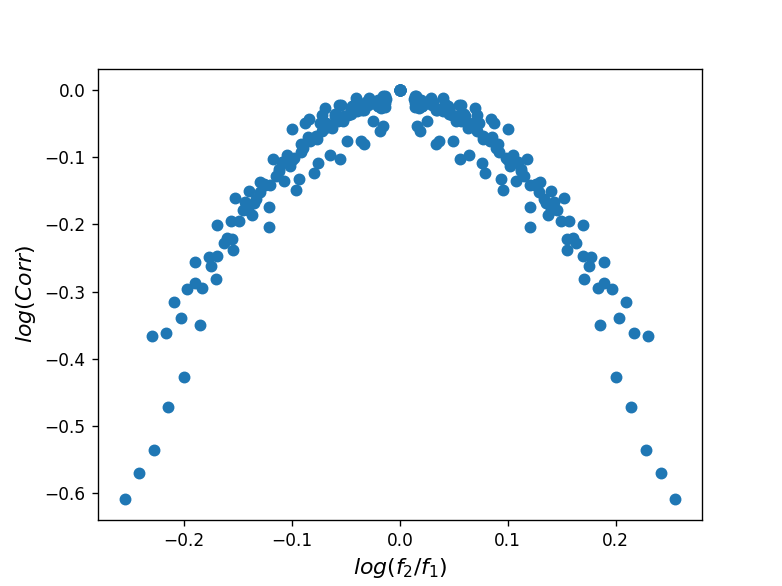

Text(0.5, 0, '$log(f_{2}/f_{1})$')

In [38]:
plt.figure()


freq_axis=[]
corr_axis=[]
for chn in np.arange(Freq_J0437_Entire.shape[0]):#10*sbplt,10*(sbplt+1)):#R_J0437_Entire_spr.shape[0]):
    for i in range(Freq_J0437_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_J0437_Entire[i]/Freq_J0437_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_J0437_Entire[i,chn]/(np.sqrt(Cov_jitter_J0437_Entire[chn,chn]*Cov_jitter_J0437_Entire[i,i]))**1))
    #plt.xlim(-1000,1000)
    #plt.xlim(-0.4,0.4)
plt.plot((freq_axis),corr_axis,'o',label='mk_L-band')#,label="$f_{1}=$"+str(int(Freq_J0437_Entire[chn])))
#plt.xscale('log')
#plt.title("Parkes UWL")
plt.ylabel("$log(Corr)$",size=13)
plt.xlabel("$log(f_{2}/f_{1})$",size=13)   
    

<IPython.core.display.Javascript object>


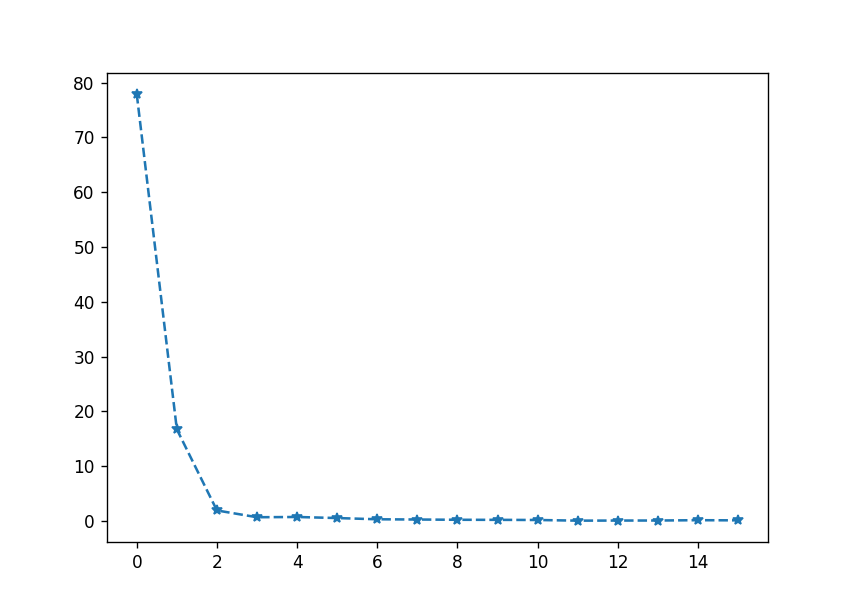

<IPython.core.display.Javascript object>


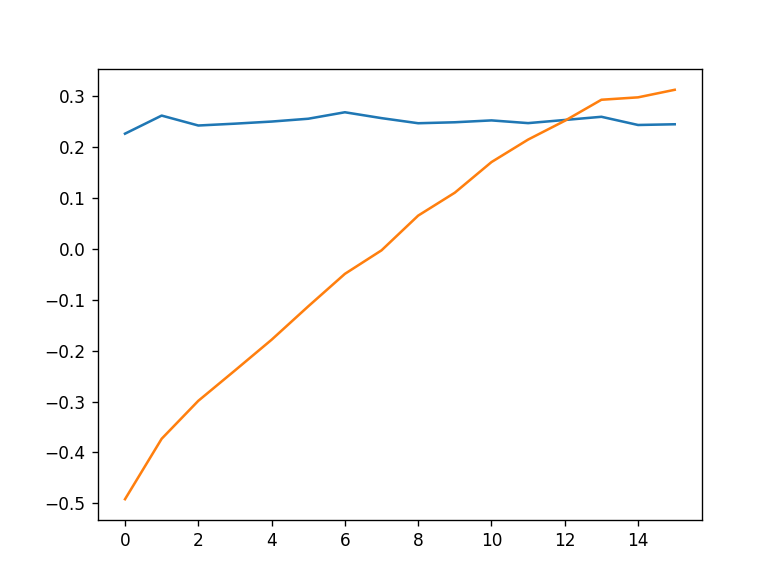

In [39]:
lam, evecs=np.linalg.eig(Cov_jitter_J0437_Entire)
plt.figure(figsize=(7,5))
plt.plot(((lam/np.sum(lam))*100),'*--',label='Jitter Covariance Matrix')
plt.figure()
plt.plot(evecs[:,:2])

## J1022+1001

In [2]:
telescope='MeerKAT'


if telescope=='MeerKAT':
    os.chdir('/fred/oz005/users/akulkarn/J1022+1001/timfiles_f16_2p5T/2019-08-02')
    Total_chn=16
    residuals_J1022_Entire_data = np.genfromtxt('PostRes_2p5T_DM_allFD.txt')
    residuals_J1022_SysNoise_Entire_data = np.genfromtxt('PostRes_2p5T_SysNoise_DM_allFD.txt')


residuals_J1022_Entire_data = residuals_J1022_Entire_data.reshape((-1,Total_chn,4)) 

residuals_J1022_Entire=residuals_J1022_Entire_data[:,:,2]
Freq_J1022_Entire=np.mean(residuals_J1022_Entire_data[:,:,1],axis=0)

residuals_J1022_SysNoise_Entire_data = residuals_J1022_SysNoise_Entire_data.reshape((-1,Total_chn,4))

residuals_J1022_SysNoise_Entire=residuals_J1022_SysNoise_Entire_data[:,:,2]
Freq_J1022_SysNoise_Entire=np.mean(residuals_J1022_SysNoise_Entire_data[:,:,1],axis=0)


# residuals_J1022_Entire=residuals_J1022_Entire[0:-1,:]
# residuals_J1022_SysNoise_Entire=residuals_J1022_SysNoise_Entire[0:-1,:]

<IPython.core.display.Javascript object>


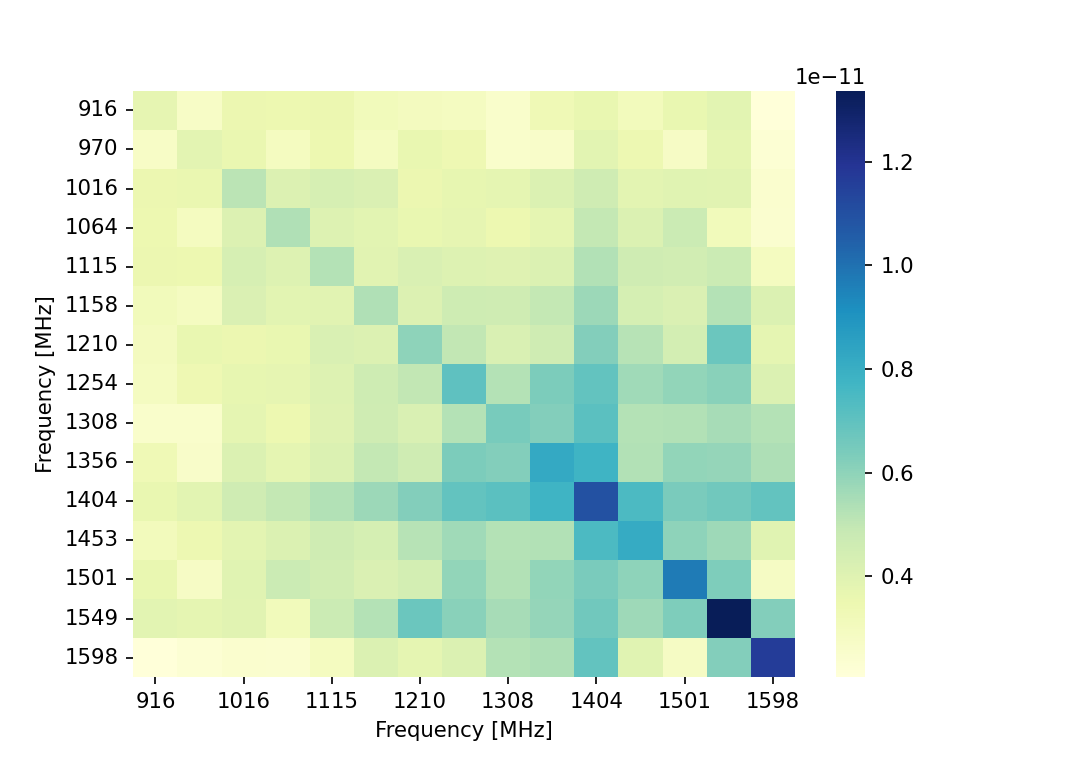

Text(58.222222222222214, 0.5, 'Frequency [MHz]')

In [76]:
Cov_res_J1022_Entire=np.cov(residuals_J1022_Entire,rowvar=False)
Corrcof_res_J1022_Entire=np.corrcoef(residuals_J1022_Entire,rowvar=False)
Cov_sysres_J1022_Entire=np.cov(residuals_J1022_SysNoise_Entire,rowvar=False)
Freq_J1022_Entire=np.mean(residuals_J1022_Entire_data[:,:,1],axis=0)

if telescope=='MeerKAT':
    ef=np.zeros((residuals_J1022_SysNoise_Entire.shape[1],residuals_J1022_SysNoise_Entire.shape[1]))
    np.fill_diagonal(ef,10.9634**2)

    eq=np.zeros((residuals_J1022_SysNoise_Entire.shape[1],residuals_J1022_SysNoise_Entire.shape[1]))
    np.fill_diagonal(eq,10**(-5.4290*2))
    
    mat_ef_eq = np.multiply(Cov_sysres_J1022_Entire,ef) + eq

#Cov_jitter_J1022_Entire=Cov_sysres_J1022_Entire
Cov_jitter_J1022_Entire=Cov_res_J1022_Entire#-Cov_sysres_J1022_Entire
#Cov_jitter_J1022_Entire=Cov_res_J1022_Entire-mat_ef_eq

########### Subtracting only the diagonal elements of ystem noise matrix #######################
sys_var = np.array([Cov_sysres_J1022_Entire[chn,chn] for chn in range(Cov_sysres_J1022_Entire.shape[0])])
sysvar_diag = np.diag(sys_var)
#Cov_jitter_J1022_Entire=Cov_res_J1022_Entire-sysvar_diag

###################################################################################################

fstr=0
fstp=15
Cov_jitter_J1022_Entire = Cov_jitter_J1022_Entire[fstr:fstp,fstr:fstp]
Freq_J1022_Entire = Freq_J1022_Entire[fstr:fstp]

df=pd.DataFrame(data=Cov_jitter_J1022_Entire,
               index=[int(Freq_J1022_Entire[i]) for i in range(Freq_J1022_Entire.shape[0])],
               columns=[int(Freq_J1022_Entire[i]) for i in range(Freq_J1022_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax,xticklabels=2,cmap='YlGnBu')
Ax.set_xlabel("Frequency [MHz]")
Ax.set_ylabel("Frequency [MHz]")
#Ax.set_title('Parkes UWL')

<IPython.core.display.Javascript object>


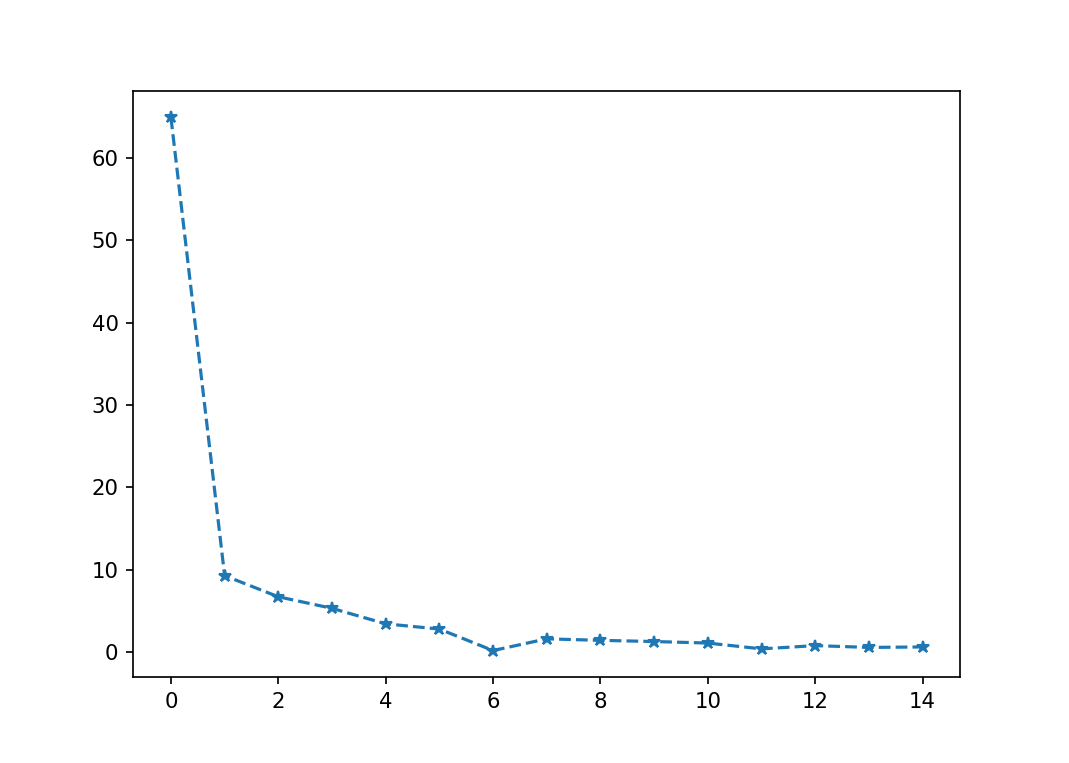

<IPython.core.display.Javascript object>


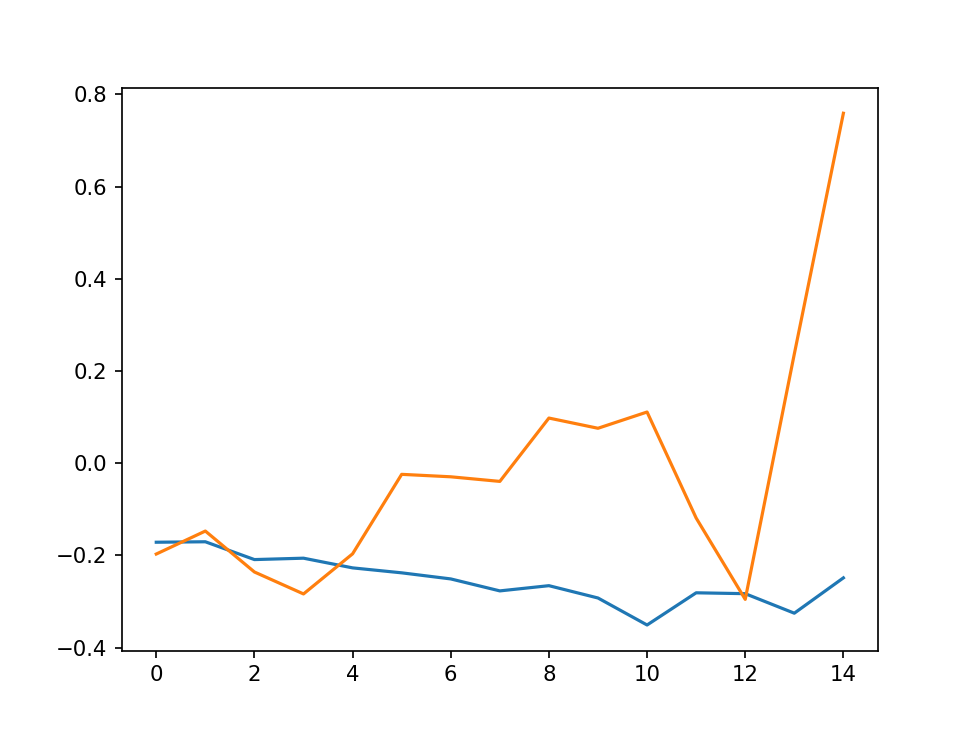

In [77]:
lam, evecs=np.linalg.eig(Cov_jitter_J1022_Entire)
plt.figure(figsize=(7,5))
plt.plot(((lam/np.sum(lam))*100),'*--',label='Jitter Covariance Matrix')
plt.figure()
plt.plot(evecs[:,:2])
#plt.imshow(evecs)#[:,:2])

<IPython.core.display.Javascript object>


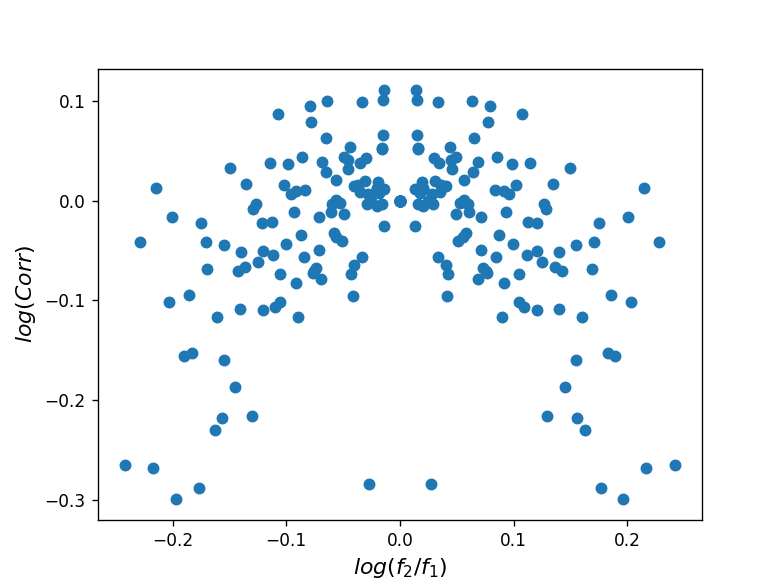

Text(0.5, 0, '$log(f_{2}/f_{1})$')

In [40]:
plt.figure()

Cov_jitter_J1022_Entire=Cov_res_J1022_Entire-sysvar_diag
freq_axis=[]
corr_axis=[]

for chn in np.arange(Freq_J1022_Entire.shape[0]):#10*sbplt,10*(sbplt+1)):#R_J1022_Entire_spr.shape[0]):
    for i in range(Freq_J1022_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_J1022_Entire[i]/Freq_J1022_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_J1022_Entire[i,chn]/(np.sqrt(Cov_jitter_J1022_Entire[chn,chn]*Cov_jitter_J1022_Entire[i,i]))**1))
    #plt.xlim(-1000,1000)
#     plt.xlim(-0.4,0.4)
#     plt.ylim(-0.4,0.4)
plt.plot((freq_axis),corr_axis,'o')#,label="$f_{1}=$"+str(int(Freq_J1022_Entire[chn])))
#     freq_axis=[]
#     corr_axis=[]
#plt.xscale('log')
#plt.title("Parkes UWL")
plt.ylabel("$log(Corr)$",size=13)
plt.xlabel("$log(f_{2}/f_{1})$",size=13) 
#plt.legend()
 


## J1744-1134

In [52]:
telescope='MeerKAT'


if telescope=='MeerKAT':
    os.chdir('/fred/oz005/users/akulkarn/J1744-1134/timfiles_2p5T/2021-01-04')
    Total_chn=16
    residuals_J1744_Entire_data = np.genfromtxt('PostRes_2p5T_DM.txt')
    residuals_J1744_SysNoise_Entire_data = np.genfromtxt('PostRes_2p5T_SysNoise_DM.txt')


residuals_J1744_Entire_data = residuals_J1744_Entire_data.reshape((-1,Total_chn,4)) 

residuals_J1744_Entire=residuals_J1744_Entire_data[:,:,2]
Freq_J1744_Entire=np.mean(residuals_J1744_Entire_data[:,:,1],axis=0)

residuals_J1744_SysNoise_Entire_data = residuals_J1744_SysNoise_Entire_data.reshape((-1,Total_chn,4))

residuals_J1744_SysNoise_Entire=residuals_J1744_SysNoise_Entire_data[:,:,2]
Freq_J1744_SysNoise_Entire=np.mean(residuals_J1744_SysNoise_Entire_data[:,:,1],axis=0)


# residuals_J1744_Entire=residuals_J1744_Entire[0:-1,:]
# residuals_J1744_SysNoise_Entire=residuals_J1744_SysNoise_Entire[0:-1,:]

<IPython.core.display.Javascript object>


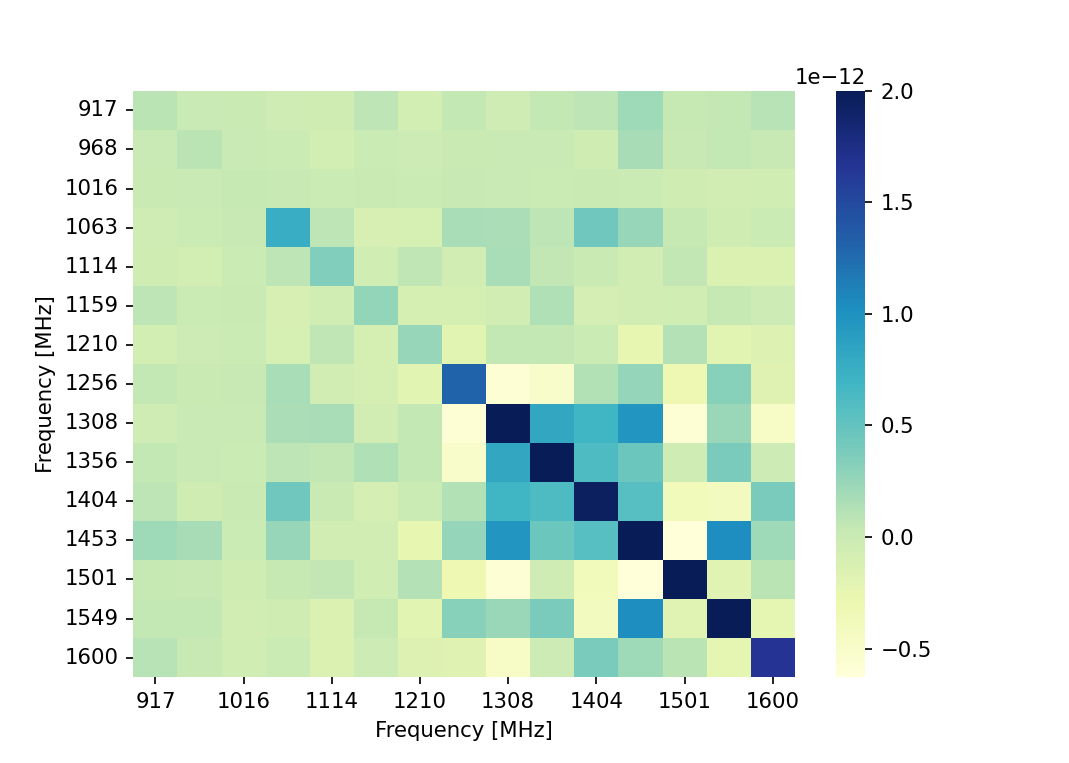

Text(58.222222222222214, 0.5, 'Frequency [MHz]')

In [78]:
Cov_res_J1744_Entire=np.cov(residuals_J1744_Entire,rowvar=False)
Corrcof_res_J1744_Entire=np.corrcoef(residuals_J1744_Entire,rowvar=False)
Cov_sysres_J1744_Entire=np.cov(residuals_J1744_SysNoise_Entire,rowvar=False)
Freq_J1744_Entire=np.mean(residuals_J1744_Entire_data[:,:,1],axis=0)

if telescope=='MeerKAT':
    ef=np.zeros((residuals_J1744_SysNoise_Entire.shape[1],residuals_J1744_SysNoise_Entire.shape[1]))
    np.fill_diagonal(ef,10.9634**2)

    eq=np.zeros((residuals_J1744_SysNoise_Entire.shape[1],residuals_J1744_SysNoise_Entire.shape[1]))
    np.fill_diagonal(eq,10**(-5.4290*2))
    
    mat_ef_eq = np.multiply(Cov_sysres_J1744_Entire,ef) + eq

Cov_jitter_J1744_Entire=Cov_sysres_J1744_Entire
#Cov_jitter_J1744_Entire=Cov_res_J1744_Entire#-Cov_sysres_J1744_Entire
#Cov_jitter_J1744_Entire=Cov_res_J1744_Entire-mat_ef_eq


########### Subtracting only the diagonal elements of ystem noise matrix #######################
sys_var = np.array([Cov_sysres_J1744_Entire[chn,chn] for chn in range(Cov_sysres_J1744_Entire.shape[0])])
sysvar_diag = np.diag(sys_var)
#Cov_jitter_J1744_Entire=Cov_res_J1744_Entire-sysvar_diag

###################################################################################################

fstr=0
fstp=15
Cov_jitter_J1744_Entire = Cov_jitter_J1744_Entire[fstr:fstp,fstr:fstp]
Freq_J1744_Entire = Freq_J1744_Entire[fstr:fstp]

df=pd.DataFrame(data=Cov_jitter_J1744_Entire,
               index=[int(Freq_J1744_Entire[i]) for i in range(Freq_J1744_Entire.shape[0])],
               columns=[int(Freq_J1744_Entire[i]) for i in range(Freq_J1744_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax,xticklabels=2,cmap='YlGnBu',vmax= 2e-12)
Ax.set_xlabel("Frequency [MHz]")
Ax.set_ylabel("Frequency [MHz]")
#Ax.set_title('Parkes UWL')

<IPython.core.display.Javascript object>


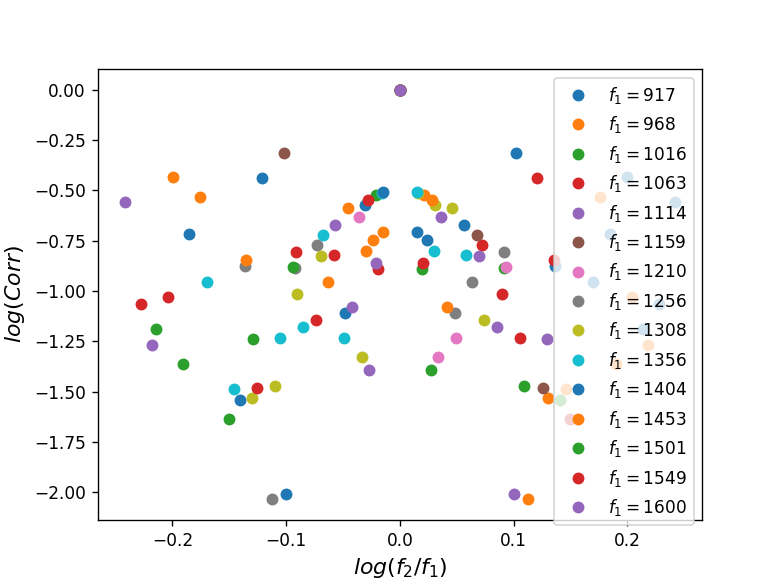

/tmp/ipykernel_33366/3552055129.py:9: RuntimeWarning: invalid value encountered in log10
  corr_axis.append(np.log10(Cov_jitter_J1744_Entire[i,chn]/(np.sqrt(Cov_jitter_J1744_Entire[chn,chn]*Cov_jitter_J1744_Entire[i,i]))**1))


In [70]:
plt.figure()

freq_axis=[]
corr_axis=[]

for chn in np.arange(Freq_J1744_Entire.shape[0]):#10*sbplt,10*(sbplt+1)):#R_J1744_Entire_spr.shape[0]):
    for i in range(Freq_J1744_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_J1744_Entire[i]/Freq_J1744_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_J1744_Entire[i,chn]/(np.sqrt(Cov_jitter_J1744_Entire[chn,chn]*Cov_jitter_J1744_Entire[i,i]))**1))
    #plt.xlim(-1000,1000)
    #plt.xlim(-0.4,0.4)
    plt.plot((freq_axis),corr_axis,'o',label="$f_{1}=$"+str(int(Freq_J1744_Entire[chn])))
    freq_axis=[]
    corr_axis=[]
#plt.xscale('log')
#plt.title("Parkes UWL")
plt.ylabel("$log(Corr)$",size=13)
plt.xlabel("$log(f_{2}/f_{1})$",size=13) 
plt.legend()
    

<IPython.core.display.Javascript object>


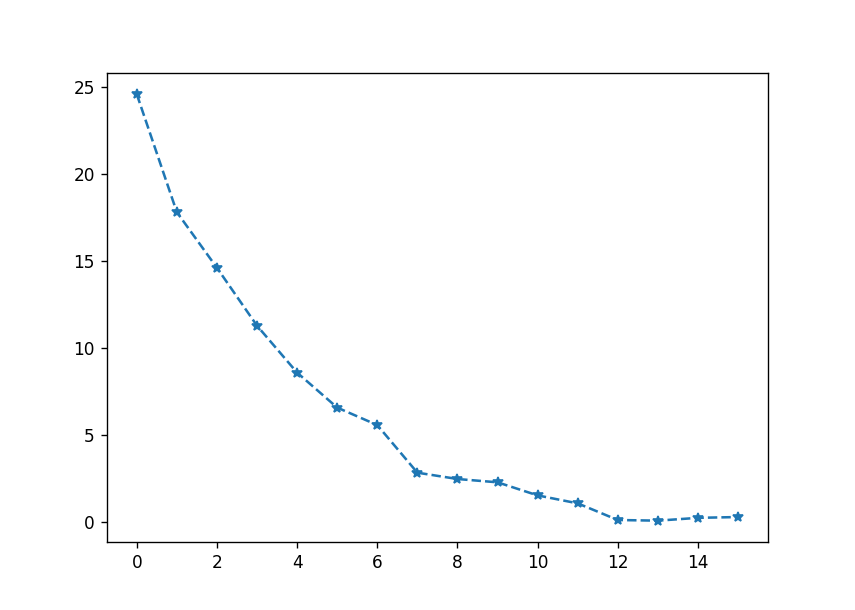

<IPython.core.display.Javascript object>


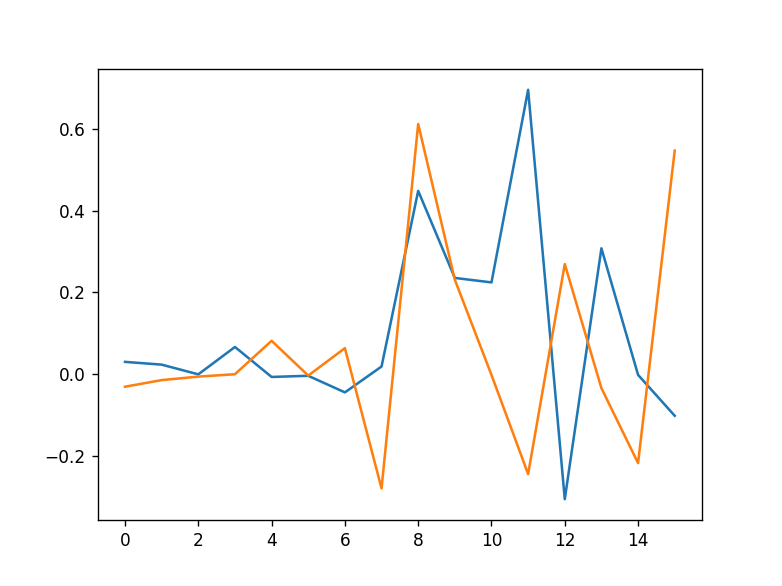

In [69]:
Cov_jitter_J1744_Entire=Cov_sysres_J1744_Entire

lam, evecs=np.linalg.eig(Cov_jitter_J1744_Entire)
plt.figure(figsize=(7,5))
plt.plot(((lam/np.sum(lam))*100),'*--',label='Jitter Covariance Matrix')
plt.figure()
plt.plot(evecs[:,:2])

<IPython.core.display.Javascript object>


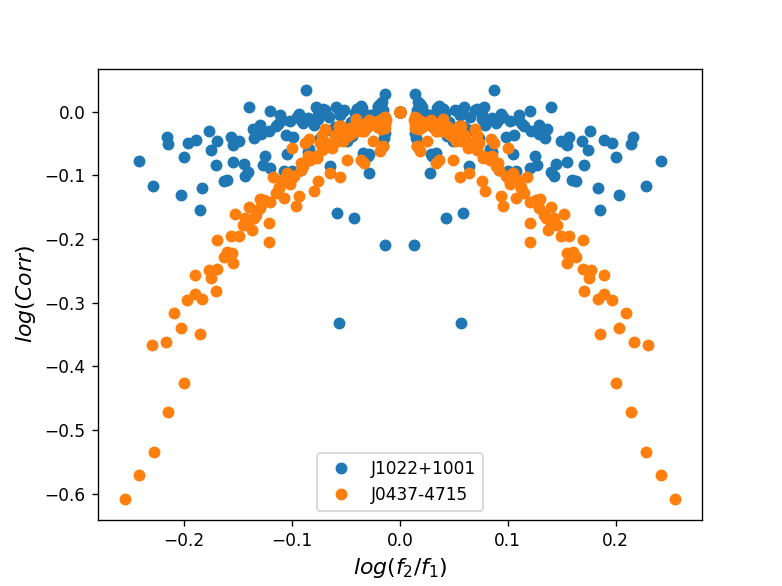

In [50]:
plt.figure()

freq_axis=[]
corr_axis=[]

for chn in np.arange(Freq_J1022_Entire.shape[0]):#10*sbplt,10*(sbplt+1)):#R_J1022_Entire_spr.shape[0]):
    for i in range(Freq_J1022_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_J1022_Entire[i]/Freq_J1022_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_J1022_Entire[i,chn]/(np.sqrt(Cov_jitter_J1022_Entire[chn,chn]*Cov_jitter_J1022_Entire[i,i]))**1))
    #plt.xlim(-1000,1000)
    #plt.xlim(-0.4,0.4)
plt.plot((freq_axis),corr_axis,'o',label='J1022+1001')#,label="$f_{1}=$"+str(int(Freq_J1022_Entire[chn])))


freq_axis=[]
corr_axis=[]
for chn in np.arange(Freq_J0437_Entire.shape[0]):#10*sbplt,10*(sbplt+1)):#R_J0437_Entire_spr.shape[0]):
    for i in range(Freq_J0437_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_J0437_Entire[i]/Freq_J0437_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_J0437_Entire[i,chn]/(np.sqrt(Cov_jitter_J0437_Entire[chn,chn]*Cov_jitter_J0437_Entire[i,i]))**1))
    #plt.xlim(-1000,1000)
    #plt.xlim(-0.4,0.4)
plt.plot((freq_axis),corr_axis,'o',label='J0437-4715')#,label="$f_{1}=$"+str(int(Freq_J0437_Entire[chn])))

plt.ylabel("$log(Corr)$",size=13)
plt.xlabel("$log(f_{2}/f_{1})$",size=13) 
plt.legend()

## J2145-0750 


In [20]:
telescope='MeerKAT'


if telescope=='MeerKAT':
    os.chdir('/fred/oz005/users/akulkarn/J2145-0750/timfiles_2p5T/2021-12-14')
    Total_chn=16
    residuals_J2145_Entire_data = np.genfromtxt('PostRes_2p5T_F0_DM.txt')
    residuals_J2145_SysNoise_Entire_data = np.genfromtxt('PostRes_2p5T_SysNoise_F0_DM.txt')


residuals_J2145_Entire_data = residuals_J2145_Entire_data.reshape((-1,Total_chn,4)) 

residuals_J2145_Entire=residuals_J2145_Entire_data[:,:,2]
Freq_J2145_Entire=np.mean(residuals_J2145_Entire_data[:,:,1],axis=0)

residuals_J2145_SysNoise_Entire_data = residuals_J2145_SysNoise_Entire_data.reshape((-1,Total_chn,4))

residuals_J2145_SysNoise_Entire=residuals_J2145_SysNoise_Entire_data[:,:,2]
Freq_J2145_SysNoise_Entire=np.mean(residuals_J2145_SysNoise_Entire_data[:,:,1],axis=0)


# residuals_J2145_Entire=residuals_J2145_Entire[0:-1,:]
# residuals_J2145_SysNoise_Entire=residuals_J2145_SysNoise_Entire[0:-1,:]

<IPython.core.display.Javascript object>


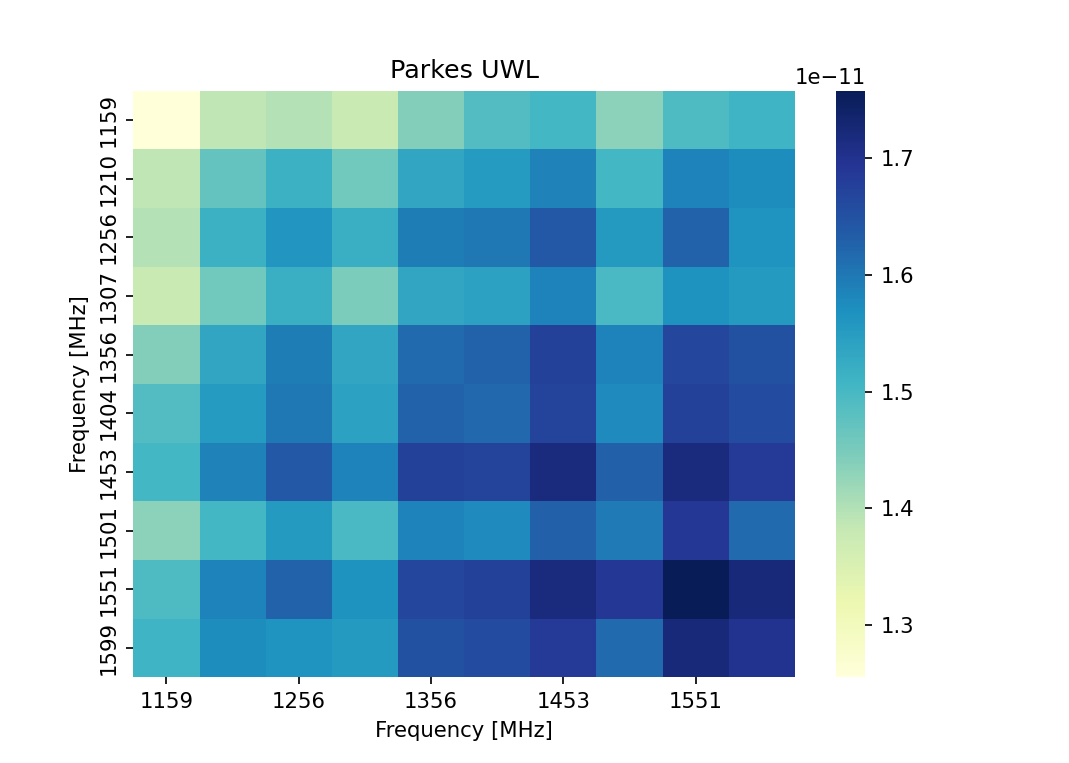

Text(0.5, 1.0, 'Parkes UWL')

In [32]:
Cov_res_J2145_Entire=np.cov(residuals_J2145_Entire,rowvar=False)
Corrcof_res_J2145_Entire=np.corrcoef(residuals_J2145_Entire,rowvar=False)
Cov_sysres_J2145_Entire=np.cov(residuals_J2145_SysNoise_Entire,rowvar=False)
Freq_J2145_Entire=np.mean(residuals_J2145_Entire_data[:,:,1],axis=0)

if telescope=='MeerKAT':
    ef=np.zeros((residuals_J2145_SysNoise_Entire.shape[1],residuals_J2145_SysNoise_Entire.shape[1]))
    np.fill_diagonal(ef,10.9634**2)

    eq=np.zeros((residuals_J2145_SysNoise_Entire.shape[1],residuals_J2145_SysNoise_Entire.shape[1]))
    np.fill_diagonal(eq,10**(-5.4290*2))
    
    mat_ef_eq = np.multiply(Cov_sysres_J2145_Entire,ef) + eq

#Cov_jitter_J2145_Entire=Cov_sysres_J2145_Entire
Cov_jitter_J2145_Entire=Cov_res_J2145_Entire#-Cov_sysres_J2145_Entire
#Cov_jitter_J2145_Entire=Cov_res_J2145_Entire-mat_ef_eq



########### Subtracting only the diagonal elements of ystem noise matrix #######################
sys_var = np.array([Cov_sysres_J2145_Entire[chn,chn] for chn in range(Cov_sysres_J2145_Entire.shape[0])])
sysvar_diag = np.diag(sys_var)
Cov_jitter_J2145_Entire=Cov_res_J2145_Entire-sysvar_diag

###################################################################################################

fstr=5
fstp=15
Cov_jitter_J2145_Entire = Cov_jitter_J2145_Entire[fstr:fstp,fstr:fstp]
Freq_J2145_Entire = Freq_J2145_Entire[fstr:fstp]


df=pd.DataFrame(data=Cov_jitter_J2145_Entire,
               index=[int(Freq_J2145_Entire[i]) for i in range(Freq_J2145_Entire.shape[0])],
               columns=[int(Freq_J2145_Entire[i]) for i in range(Freq_J2145_Entire.shape[0])])
Fig, Ax = plt.subplots(figsize=(7,5))
sns.heatmap(df,ax=Ax,xticklabels=2,cmap='YlGnBu')
Ax.set_xlabel("Frequency [MHz]")
Ax.set_ylabel("Frequency [MHz]")
Ax.set_title('Parkes UWL')

<IPython.core.display.Javascript object>


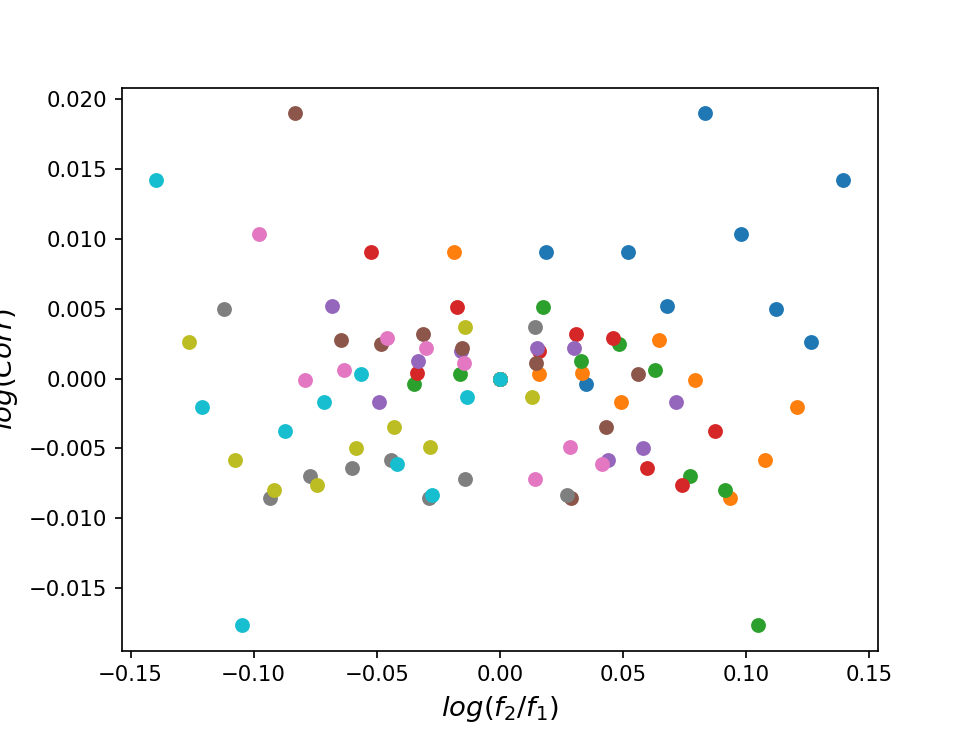

Text(0.5, 0, '$log(f_{2}/f_{1})$')

In [33]:
plt.figure()


freq_axis=[]
corr_axis=[]
for chn in np.arange(Freq_J2145_Entire.shape[0]):#10*sbplt,10*(sbplt+1)):#R_J2145_Entire_spr.shape[0]):
    for i in range(Freq_J2145_Entire.shape[0]):
        freq_axis.append((np.log10(Freq_J2145_Entire[i]/Freq_J2145_Entire[chn])**1))
        corr_axis.append(np.log10(Cov_jitter_J2145_Entire[i,chn]/(np.sqrt(Cov_jitter_J2145_Entire[chn,chn]*Cov_jitter_J2145_Entire[i,i]))**1))
    #plt.xlim(-1000,1000)
    #plt.xlim(-0.4,0.4)
    plt.plot((freq_axis),corr_axis,'o',label='mk_L-band')#,label="$f_{1}=$"+str(int(Freq_J2145_Entire[chn])))
    freq_axis=[]
    corr_axis=[]
#plt.xscale('log')
#plt.title("Parkes UWL")
plt.ylabel("$log(Corr)$",size=13)
plt.xlabel("$log(f_{2}/f_{1})$",size=13)   
    

<IPython.core.display.Javascript object>


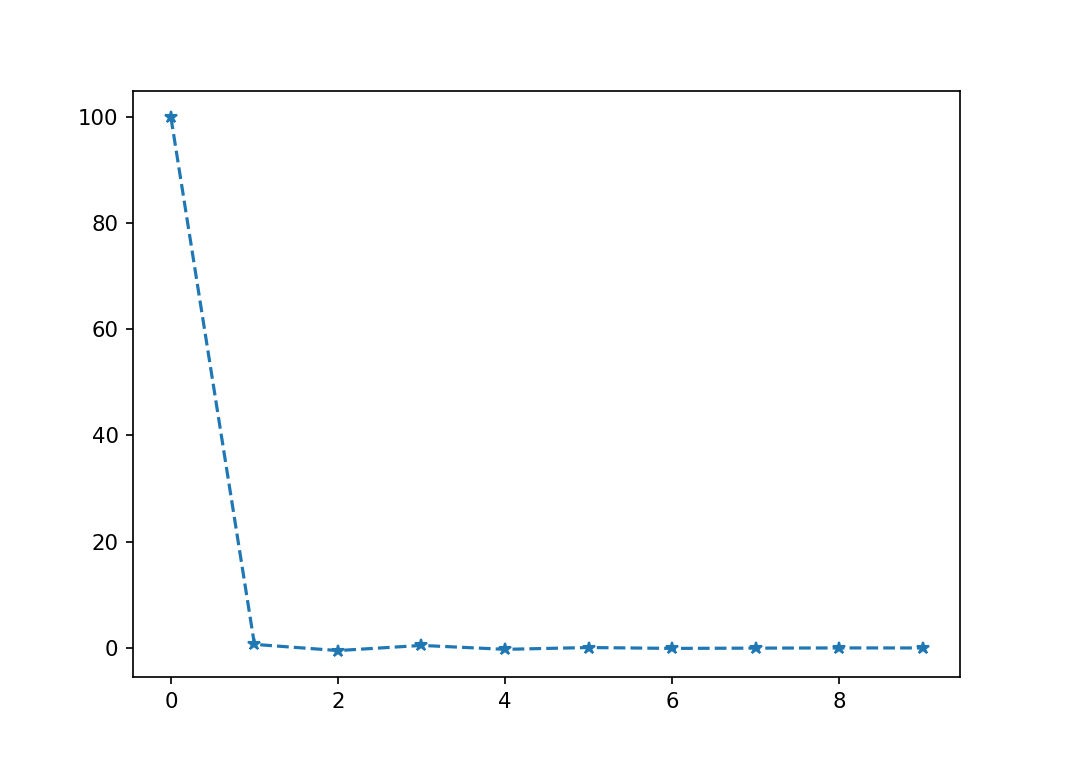

<IPython.core.display.Javascript object>


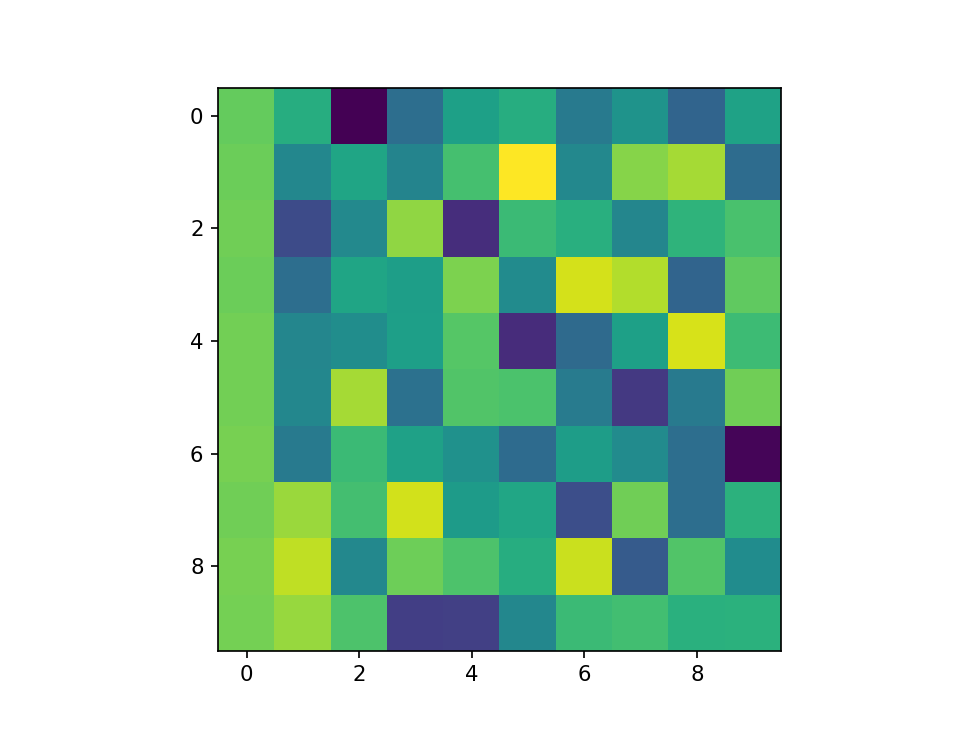

In [35]:
lam, evecs=np.linalg.eig(Cov_jitter_J2145_Entire)
plt.figure(figsize=(7,5))
plt.plot(((lam/np.sum(lam))*100),'*--',label='Jitter Covariance Matrix')
plt.figure()
plt.imshow(evecs[:,:])
#plt.plot(evecs[:,:2])

Simulating perfect correlation in TOAs